#1주차 과제
- 파이토치 시작하기 및 간단한 코드 빈칸 채워넣기

#파이토치 시작하기

파이토치 시작하기

In [ ]:
import torch 

- tensor 개념 파악 (array of numerical values(vector, matrix..))
- 4x3 행렬 두개 만들고 행으로 병합, 열로 병합


In [ ]:
X=torch.zeros((4,3))
Y=torch.ones((4,3))
print(torch.cat([X,Y], dim=0)) #행병합
print(torch.cat([X,Y], dim=1)) #열병합

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 1., 1., 1.]])


linear regression implementation from scratch
- 머신러닝 기초와 비슷한 내용이지만 파이토치로 실행해보며 익숙해지는것이 목표


In [ ]:
!pip install d2l

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.5.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.0.0
    Uninstalling matplotlib-3.0.0:
      Successfully uninstalled matplotlib-3.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [ ]:
def synthetic_data(w, b, num_examples):
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = synthetic_data(true_w, true_b, 2000)

In [ ]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([-0.3851, -0.5474]) 
label: tensor([5.1542])


In [ ]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [ ]:
batch_size = 20

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.1355, -0.4512],
        [ 1.8587, -0.5554],
        [ 0.2514,  0.9887],
        [-1.3472, -0.3929],
        [-1.4514, -0.3248],
        [-0.6570,  0.0412],
        [-2.5199,  0.3725],
        [ 0.6000, -0.5971],
        [-0.7021, -1.4853],
        [-2.6050,  0.7614],
        [ 0.6213,  1.2357],
        [-0.5795,  1.0556],
        [-0.1217,  0.4531],
        [-2.1472,  1.4024],
        [-2.1736,  0.2319],
        [ 0.3025,  0.1307],
        [-0.2374, -0.1202],
        [ 0.0111, -1.2419],
        [-1.4722,  0.4834],
        [ 0.2934, -0.6708]]) 
 tensor([[ 5.7624],
        [11.9115],
        [ 4.7609],
        [ 2.0595],
        [ 1.6211],
        [ 3.4690],
        [-2.6181],
        [ 8.2193],
        [ 5.6301],
        [-3.4545],
        [ 5.5205],
        [ 2.1914],
        [ 4.4566],
        [-3.0410],
        [-1.3518],
        [ 6.2014],
        [ 4.9710],
        [ 7.3890],
        [ 0.3497],
        [ 7.3776]])


In [ ]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [ ]:
def linreg(X, w, b):
    return torch.matmul(X, w)+b

In [ ]:
def squared_loss(y_hat, y):  
    """Squared loss."""
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

In [ ]:
def sgd(params, lr, batch_size):
    """Minibatch stochastic gradient descent."""
    with torch.no_grad():
        for param in params:
            param[:]=param-lr*param.grad / batch_size

In [ ]:
lr = 0.05
num_epochs = 5
net = linreg
loss = squared_loss
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X,w,b), y) 
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        sgd([w,b],lr,batch_size) 
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 23.267120
epoch 2, loss 27.190037
epoch 3, loss 26.461960
epoch 4, loss 14.958228
epoch 5, loss 13.711377


In [ ]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([-1.8142, -0.0697], grad_fn=<SubBackward0>)
error in estimating b: tensor([-4.9731], grad_fn=<RsubBackward1>)


+cost graph 그리기 (x축 w, y축 loss)

In [ ]:
!pip uninstall matplotlib
!pip install matplotlib==3.0.0

Found existing installation: matplotlib 3.5.1
Uninstalling matplotlib-3.5.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.1-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? ERROR: Operation cancelled by user
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 5.4 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplo

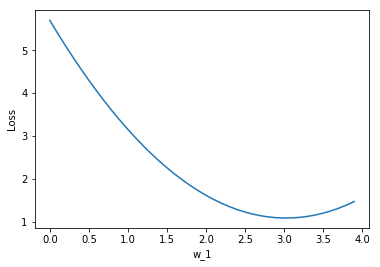

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

w_list = []
mse_list = []

for w in np.arange(0.0, true_w[0]+1, 0.1):
    l_sum = 0
    for x, y in zip(features[:,0], labels):
        l_sum += loss(np.dot(x,w)+true_b,y)
    w_list.append(w)
    mse_list.append(l_sum /features.shape[0])

plt.plot(w_list, mse_list)
plt.ylabel('Loss')
plt.xlabel('w_1')
plt.show()

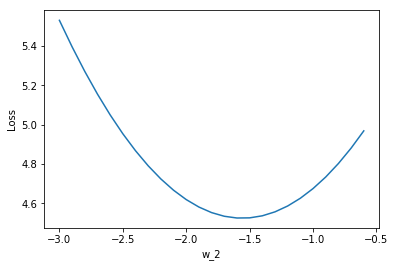

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

w_list = []
mse_list = []

for w in np.arange(-3, true_w[1]+1, 0.1):
    l_sum = 0
    for x, y in zip(features[:,1], labels):
        l_sum += loss(np.dot(x,w)+true_b,y)
    w_list.append(w)
    mse_list.append(l_sum /features.shape[0])

plt.plot(w_list, mse_list)
plt.ylabel('Loss')
plt.xlabel('w_2')
plt.show()

concise implementation of linear regression 
- api 사용해보기

In [ ]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l


true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = d2l.synthetic_data(true_w, true_b, 2000)

In [ ]:
def load_array(data_arrays, batch_size, is_train=True): 
    """Construct a PyTorch data iterator."""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 20
data_iter = load_array((features, labels), batch_size)

In [ ]:
next(iter(data_iter))

[tensor([[ 0.0425, -0.7313],
         [-0.6530, -0.5970],
         [ 0.4215, -1.3308],
         [-0.9765,  0.7723],
         [ 1.4127,  0.8889],
         [ 0.2142,  0.8964],
         [-0.8111, -1.1093],
         [-0.7255, -2.0762],
         [ 0.5121,  1.8949],
         [-2.2693, -0.2919],
         [-1.4318,  1.5964],
         [-1.1996, -0.4805],
         [ 0.6946,  0.8915],
         [ 1.1573,  0.5778],
         [-0.3632, -0.7622],
         [-1.2651,  0.3113],
         [ 1.4388, -0.8975],
         [ 0.6930,  0.6984],
         [ 0.2171, -0.0260],
         [-1.6032,  1.4392]]), tensor([[ 6.7314],
         [ 4.4225],
         [ 8.7640],
         [ 1.4102],
         [ 8.4051],
         [ 4.7959],
         [ 4.7404],
         [ 6.4438],
         [ 4.1999],
         [-0.8600],
         [-1.1893],
         [ 2.6252],
         [ 6.2493],
         [ 8.1037],
         [ 5.5440],
         [ 1.2382],
         [11.1533],
         [ 6.5351],
         [ 6.1873],
         [-1.4861]])]

In [ ]:
from torch import nn
net = nn.Sequential(nn.Linear(2,1))

In [ ]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

In [ ]:
loss = nn.MSELoss()

In [ ]:
trainer =  torch.optim.SGD(net.parameters(), lr=0.05)

In [ ]:
num_epochs = 5
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X),y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000104
epoch 2, loss 0.000104
epoch 3, loss 0.000104
epoch 4, loss 0.000104
epoch 5, loss 0.000104


In [ ]:
w = net[0].weight.data
print('error in estimating w:', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('error in estimating b:', true_b - b)

error in estimating w: tensor([-2.3842e-05,  6.2728e-04])
error in estimating b: tensor([0.0005])
